# Physical Strength & Fear-Related Personality
Data Set Source: https://www.kaggle.com/datasets/thedevastator/physical-strength-correlation-with-fear-related?resource=download

## Abstract
Welcome to my notebook. This is a data set retrieved from Kaggle, it is supposed to have 5 Samples from different students from 5 different Universities. In this Notebook I just decided to 

### HEXACO IPIP items (7-point scale):

**Anxiety, Positively Keyed:**

- e_anx_1: Often worry about things that turn out to be unimportant
- e_anx_2: Worry about things
- e_anx_3: Get stressed out easily
- e_anx_4: Get upset by unpleasant thoughts that come into my mind
- e_anx_5: Panic easily

**Anxiety, Negatively Keyed:**

- e_anx_6: Rarely worry
- e_anx_7: Rarely feel depressed
- e_anx_8: Am not easily disturbed by events
- e_anx_9: Remain calm under pressure
- e_anx_10: Don't worry about things that have already happened

**Emotional Dependence, Positively Keyed:**

- e_dep_1: Need reassurance
- e_dep_2: Let myself be influenced by others
- e_dep_3: Need the approval of others
- e_dep_4: Need protection
- e_dep_5: Often need help
- e_dep_6: Show my sadness
- e_dep_7: Suspect that my facial expressions give me away when I feel sad
- e_dep_8: Seek support
- e_dep_9: Can't do without the company of others
- e_dep_10: Want to be liked

**Fearfulness, Positively Keyed:**

- e_fear_1: Am a physical coward
- e_fear_2: Begin to panic when there is danger
- e_fear_3: Would fear walking in a high-crime part of a city
- e_fear_4: Tremble in dangerous situations
- e_fear_5: Would never go riding down a stretch of rapids in a canoe

**Fearfulness, Negatively Keyed:**

- e_fear_6: Like to do frightening things
- e_fear_7: Face danger confidently
- e_fear_8: Love dangerous situations
- e_fear_9: Would be good at rescuing people from a burning building
- e_fear_10: Am willing to take risks

**Sentimentality, Positively Keyed:**

- e_sen_1: Feel others' emotions
- e_sen_2: Immediately feel sad when hearing of an unhappy event
- e_sen_3: Cry during movies
- e_sen_4: Am sensitive to the needs of others
- e_sen_5: Am deeply moved by others' misfortunes

**Sentimentality, Negatively Keyed:**

- e_sen_6: Rarely cry during sad movies
- e_sen_7: Seldom feel weepy while reading the sad part of a story
- e_sen_8: Am seldom bothered by the apparent suffering of strangers
- e_sen_9: Don't understand people who get emotional
 -e_sen_10: Seldom get emotional
 
 
 # Sites for further learning
 
 - ## Important Link: https://www.simplilearn.com/tutorials/scikit-learn-tutorial/sklearn-linear-regression-with-examples

## Libraries
![Alt text](https://cdn.dribbble.com/users/325172/screenshots/6358244/4-emoties-3.gif)

In [902]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import sklearn.metrics
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns

## Loading the Datasets

In [903]:
s1 = pd.read_csv('datasets/archive/Sample_1.csv')
s2 = pd.read_csv('datasets/archive/Sample_2.csv')
df3 = pd.read_csv('datasets/archive/Sample_3.csv')

In [904]:
s1.columns[6:]

Index(['e_anx_1', 'e_anx_2', 'e_anx_3', 'e_anx_4', 'e_anx_5', 'e_anx_6',
       'e_anx_7', 'e_anx_8', 'e_anx_9', 'e_anx_10', 'e_dep_1', 'e_dep_2',
       'e_dep_3', 'e_dep_4', 'e_dep_5', 'e_dep_6', 'e_dep_7', 'e_dep_8',
       'e_dep_9', 'e_dep_10', 'e_fear_1', 'e_fear_2', 'e_fear_3', 'e_fear_4',
       'e_fear_5', 'e_fear_6', 'e_fear_7', 'e_fear_8', 'e_fear_9', 'e_fear_10',
       'e_sen_1', 'e_sen_2', 'e_sen_3', 'e_sen_4', 'e_sen_5', 'e_sen_6',
       'e_sen_7', 'e_sen_8', 'e_sen_9', 'e_sen_10'],
      dtype='object')

Here I am erasing the column **p:_id** because i don't consider it to be insightful. 
I am also changing the values from the **gender and ethnicity** columns to categorical data, so I can transform it later using Onehot Enconder, being that the ethnity has values from 1 to 8 causing this to be "hirearchical".

In [905]:
df_train, df_test = train_test_split(s1)
print(df_train.isnull().sum())
print(df_train['ethnicity'].value_counts())
print(df_train['grip'].value_counts())
print(df_train['chest'].value_counts())

p_id         0
age          0
female       0
ethnicity    0
grip         0
chest        1
e_anx_1      0
e_anx_2      0
e_anx_3      0
e_anx_4      0
e_anx_5      0
e_anx_6      0
e_anx_7      0
e_anx_8      0
e_anx_9      0
e_anx_10     0
e_dep_1      0
e_dep_2      0
e_dep_3      0
e_dep_4      0
e_dep_5      0
e_dep_6      0
e_dep_7      0
e_dep_8      0
e_dep_9      0
e_dep_10     0
e_fear_1     0
e_fear_2     0
e_fear_3     0
e_fear_4     0
e_fear_5     0
e_fear_6     0
e_fear_7     0
e_fear_8     0
e_fear_9     0
e_fear_10    0
e_sen_1      0
e_sen_2      0
e_sen_3      0
e_sen_4      0
e_sen_5      0
e_sen_6      0
e_sen_7      0
e_sen_8      0
e_sen_9      0
e_sen_10     0
dtype: int64
1    71
2    23
5    19
8    14
3     2
6     1
7     1
Name: ethnicity, dtype: int64
30    13
38     6
50     5
52     5
51     5
34     5
32     5
25     4
22     4
40     4
26     4
36     4
31     4
27     4
54     4
48     4
35     3
55     3
33     3
21     3
28     3
49     3
58     3
16  

We can observe that there is 1 explicit null value in chest column and there are no observable implicit null values in the rest of the data frame.

Since it is explicit we can remove it easily from both train and test.

In [906]:
df_train = df_train.dropna()
df_test = df_test.dropna()


I will removethe **p_id** column since I consider it uninsightful.
Since the ethnicity is defined with numbers from 1 to 8, i will change it to categorical values so we dont confuse them with scalar values.

<AxesSubplot:>

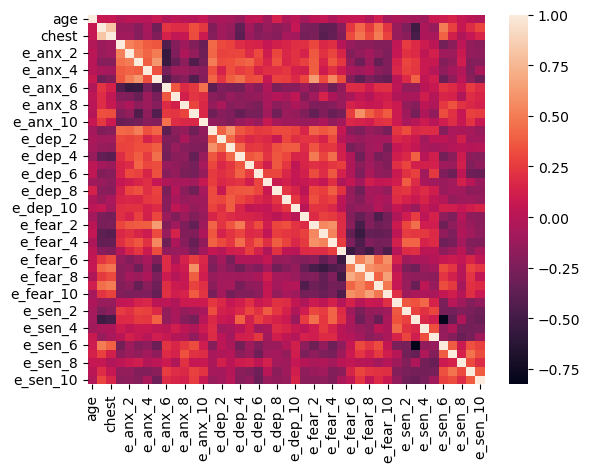

In [907]:
#Applying changes in Train
df_train.rename(columns={'female' : 'gender'}, inplace=True)
df_train.drop(columns=['p_id'], inplace=True)
df_train["ethnicity"].replace({1:"White/Euro-American", 2:"Hispanic/Latino", 3:"Black/African-American",
                         5:"Asian-American", 6:"Other",7:"Pacific Islander", 8:"Biracial"}, inplace=True)
df_train['gender'].replace({0:'Male', 1:'Female'}, inplace=True)
#Applying changes in Test
df_test.rename(columns={'female' : 'gender'}, inplace=True)
df_test.drop(columns=['p_id'], inplace=True)
df_test["ethnicity"].replace({1:"White/Euro-American", 2:"Hispanic/Latino", 3:"Black/African-American",
                         5:"Asian-American", 6:"Other",7:"Pacific Islander", 8:"Biracial"}, inplace=True)
df_test['gender'].replace({0:'Male', 1:'Female'}, inplace=True)

df_corr = df_train.corr()
sns.heatmap(df_corr)

## Separating Features

In [908]:
x_train = df_train.drop(['grip'], axis=1)
y_train = df_train['grip']

x_test = df_test.drop(['grip'], axis=1)
y_test = df_test['grip']


In [890]:
x_test.shape

(44, 44)

In [891]:
y_test.shape

(44,)

# Pipeline OneHot and Std Scaler

In [892]:
cat_columns = ['gender', 'ethnicity']
scalar_columns = s1.columns[6:]
cat_transformer = OneHotEncoder(handle_unknown='ignore')
scalar_transformer = sklearn.preprocessing.StandardScaler(with_mean=False)

preprocessor = ColumnTransformer(transformers=[('cat', cat_transformer, cat_columns), ('num', scalar_transformer, scalar_columns)])
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)


In [893]:
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)


x_train: (130, 49)
x_test: (44, 49)


## Random Over Sampler insted of SMOTE

In [894]:
sm = RandomOverSampler()
x_train, y_train = sm.fit_resample(x_train,y_train)
y_train.value_counts()


31    12
43    12
52    12
51    12
46    12
57    12
37    12
39    12
42    12
58    12
54    12
27    12
35    12
56    12
47    12
64    12
19    12
49    12
61    12
18    12
36    12
40    12
48    12
33    12
50    12
28    12
32    12
23    12
30    12
34    12
24    12
22    12
53    12
16    12
26    12
44    12
25    12
55    12
29    12
21    12
38    12
20    12
Name: grip, dtype: int64

In [895]:
y_train.shape, x_train.shape

((504,), (504, 49))

## Bayesian Regression

In [896]:
clf = linear_model.BayesianRidge()

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

y_pred

array([50.83726617, 37.07176491, 44.56396026, 46.75292903, 26.3916948 ,
       60.18678377, 27.63996337, 45.739344  , 25.60841596, 46.41300709,
       50.08988733, 25.57843862, 26.26555913, 34.00855426, 49.01751648,
       29.24602459, 45.57130931, 17.31208221, 45.97968219, 60.75284873,
       17.7618775 , 32.47791366, 24.39922603, 25.589668  , 23.39802285,
       51.57028204, 39.91460665, 47.41516991, 52.94304229, 20.06820373,
       45.60008796, 24.76199699, 62.40399016, 28.85193104, 46.41459465,
       45.77816313, 31.40226333, 56.05198566, 66.08053017, 56.50536477,
       46.01838476, 35.38926715, 13.05554003, 36.82385692])

In [897]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
math.sqrt(mse)

Mean Squared Error:  121.96066998376209


11.043580487494175

# END

In [898]:
#pca = sklearn.decomposition.PCA(n_components=100)
#pca.fit(x_train.toarray())

#x_train = pca.transform(x_train.toarray())
#x_test = pca.transform(x_test.toarray())
#print('x_train:', x_train.shape)
#print('x_test:', x_test.shape)
